## Problem statement
As an ML expert at The Daily Buzz, you are given the task to create a ML model to predict the
rainfall. So, you have to create a Machine Learning Model using various Classification Models
including Decision Trees and Ensemble methods, and compare the accuracy of each model.
First Load the data and perform data preprocessing and after data cleaning use decision tree
classification and then use Bagging And Boosting techniques along with the Random Forest
Classifier then find out the accuracy score of each and create a confusion matrix to evaluate the
performance. After completing this, take your best model and write why this model performed
better than other models and in what ways you can further improve the accuracy of the selected
model.

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the dataset

In [59]:
df=pd.read_excel('sydney_rain prediction.xlsx',header=0)

In [60]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


We have to train a model such that it can predict values of RainTomorrow variables. So we will get dummies for that variable so that we can get predictions as 0 or 1.

### Data preprocessing

As the Date and Location column doesn't add anything for prdicting rainfall so I am going to drop those columns.

In [61]:
df=df.drop(['Date','Location'],axis=1)

In [62]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [63]:
#creating dummy variables
df=pd.get_dummies(df,drop_first=True)

In [64]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


In [65]:
# Viewing the description of the dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


From the above description it's visible that most of the columns got missing values so I am going to replace those missing values with the mean of their respective coluns.

In [66]:
# imputing missing values 
df=df.fillna(df.mean())

In [67]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


From the previous table it should be obvious that Rainfall contains some outliers.

<AxesSubplot:>

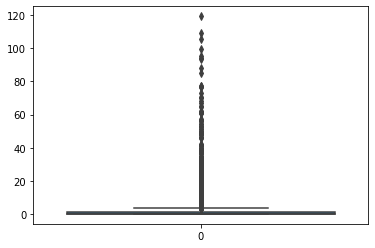

In [68]:
#using box_plot to plot the outliers in rainfall column
sns.boxplot(df['Rainfall'])

As we can see there is quite a lot outliers in 'Rainfall' column so we will perform variable transformation and transform the values in range of[0,1].

In [71]:
from sklearn.preprocessing import MinMaxScaler

def handle_rainfall(series):
    
    # Identifying outliers using IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers to the lower and upper bound
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)

    # Log transformation to handle skewness
    series = np.log1p(series)  # log1p is used to handle zero values

    # Scaling to [0, 1] range using Min-Max scaling
    scaler = MinMaxScaler()
    series = scaler.fit_transform(series.reshape(-1, 1))  # reshape is necessary for scaling

    return pd.Series(series.flatten())
df.Rainfall=handle_rainfall(df.Rainfall)

Handles outliers, applies log transformation, and scales the values of the given Pandas Series.

Parameters:

series (pd.Series): The Pandas Series to be processed.

Returns:

pd.Series: The processed Pandas Series with values scaled to the range [0, 1].


<AxesSubplot:>

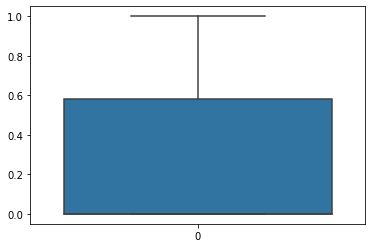

In [74]:
sns.boxplot(df.Rainfall)

In [75]:
# checking corelations
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.770701,0.025066,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.018690,0.079962
MaxTemp,0.770701,1.000000,-0.193668,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.188334,-0.149269
Rainfall,0.025066,-0.193668,1.000000,-0.244553,-0.382609,0.424108,0.359238,-0.004363,0.057014,0.333380,0.268505,-0.073746,-0.194529,0.958138,0.357003
Evaporation,0.567623,0.509060,-0.244553,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.228791,-0.064301
Sunshine,-0.062959,0.325107,-0.382609,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.367080,-0.521637
Humidity9am,0.052362,-0.186875,0.424108,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.400603,0.329011
Humidity3pm,0.270944,-0.152310,0.359238,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.342936,0.471250
Pressure9am,-0.393024,-0.388533,-0.004363,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000113,-0.032465
Pressure3pm,-0.355764,-0.424653,0.057014,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056978,0.010977
Cloud9am,0.236288,-0.087381,0.333380,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316502,0.329525


As from the above table we can see  MaxTemp and Temp3pm have very high corelation but Temp3pm have better corelation with Dependent variable so we are going to drop MaxTemp.

Similarly Temp9am got very high corelation with MinTemp but MinTemp has better corelation with the dependent variable so we are going to drop Temp9am.

Lastly Rainfall have very high corelation with RainToday_yes but Rainfall has better corelation with the dependent variable so we are going to drop RainToday_yes.

In [77]:
df=df.drop(['MaxTemp','Temp9am','RainToday_Yes'],axis=1)

In [78]:
df.head()

,MinTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainTomorrow_Yes
0,19.5,1.0,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.9,1
1,19.5,1.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,24.8,1
2,21.6,1.0,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.0,1
3,20.2,1.0,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,20.9,1
4,19.7,1.0,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,25.5,1


In [79]:
df.to_csv('preprocessed rain data')

### Creating dependent and independent varisbles

In [81]:
X=df.drop('RainTomorrow_Yes',axis=1)
y=df['RainTomorrow_Yes']

### Train_Test_Split

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [83]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 11) (668, 11) (2669,) (668,)


### All the prerequisite are done time to train the data using different models

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
clf_lrs=LogisticRegression()
clf_lrs.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
print(f'Intercept = {clf_lrs.intercept_}, Coef = {clf_lrs.coef_}')

Intercept = [0.00253468], Coef = [[-0.12105072  0.22592428  0.04584369 -0.25032329  0.00543359  0.05981462
  -0.14364688  0.13930653 -0.1061565   0.16340724  0.11848871]]


#### Predicting using default threshold value i.e. 0.5

In [86]:
y_pred = clf_lrs.predict(X_test)

### Model Evaluation
As it's a classification problem so we are going to compare all the models using accuracy score.

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [88]:
confusion_matrix(y_test,y_pred)

array([[438,  46],
       [ 80, 104]])

In [89]:
accuracy_score(y_test,y_pred)

0.811377245508982

#### Predicting using customize threshold value

In [122]:
y_pred_cust=(clf_lrs.predict_proba(X_test)[:,1]>=0.7)

### Model Evaluation

In [123]:
confusion_matrix(y_test,y_pred_cust)

array([[475,   9],
       [115,  69]])

In [124]:
accuracy_score(y_test,y_pred_cust)

0.8143712574850299

## Linear Discriminant Analysis

In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda=LinearDiscriminantAnalysis()
clf_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Model Evaluation


In [126]:
confusion_matrix(y_test,clf_lda.predict(X_test))

array([[443,  41],
       [ 79, 105]])

In [127]:
accuracy_score(y_test,clf_lda.predict(X_test)) 

0.8203592814371258

## KNN 

In [219]:
#standardizing independent variables
from sklearn import preprocessing
#standerdizing train independent variables
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler1.transform(X_train)
#standerdizing test independent variables
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler2.transform(X_test)

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf_knn=KNeighborsClassifier()

In [228]:
params = {'n_neighbors':range(3,11,2)}

In [229]:
knn_grid = GridSearchCV(clf_knn,params,n_jobs=-1,cv=5,scoring='accuracy')

In [230]:
#training
knn_grid.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 11, 2)}, scoring='accuracy')

In [231]:
# finding best parameter
knn_grid.best_params_

{'n_neighbors': 9}

In [232]:
# storing the model
clf_knn_best=knn_grid.best_estimator_

### Model evaluation

In [233]:
confusion_matrix(y_test,clf_knn_best.predict(X_test_s))

array([[444,  40],
       [ 86,  98]])

In [234]:
accuracy_score(y_test,clf_knn_best.predict(X_test_s))

0.811377245508982

## Decision Tree

In [235]:
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier(criteria='gini')

In [239]:
params={'max_depth':[2,4,6],
        'min_samples_split':[4,6,8],
       'min_samples_leaf':[5,10,20]}

In [240]:
clf_tree_grid=GridSearchCV(clf_tree,params,n_jobs=-1,cv=5,scoring='accuracy')

In [241]:
#training
clf_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [4, 6, 8]},
             scoring='accuracy')

In [242]:
clf_tree_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 4}

In [243]:
clf_tree_best=clf_tree_grid.best_estimator_

### Model Evaluation

In [244]:
confusion_matrix(y_test,clf_tree_best.predict(X_test))

array([[446,  38],
       [ 92,  92]])

In [245]:
accuracy_score(y_test,clf_tree_best.predict(X_test))

0.8053892215568862

## Bagging

In [258]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=clf_tree,bootstrap= True
                           random_state =42)

In [259]:
params={'n_estimators':[100,250,500]}

In [260]:
bag_grid = GridSearchCV(bag_clf,params,n_jobs=-1,cv=5,scoring='accuracy')

In [261]:
bag_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [262]:
#finding best model parameters
bag_grid.best_params_

{'n_estimators': 250}

In [263]:
#storing best model
bag_best=bag_grid.best_estimator_

### Model Evaluation

In [264]:
confusion_matrix(y_test,bag_best.predict(X_test))

array([[447,  37],
       [ 75, 109]])

In [265]:
accuracy_score(y_test,bag_best.predict(X_test))

0.8323353293413174

## Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)

In [272]:
params={'n_estimators':[100,250],
        'max_depth':[3,4,5],
        'max_features':[4,7,10],
        'min_samples_split':[2,3,10]
}

In [273]:
rf_grid= GridSearchCV(rf,params,
                          n_jobs=-1,cv=5,scoring='accuracy')

In [274]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [4, 7, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 250]},
             scoring='accuracy')

In [275]:
# finding best model parameters
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_split': 3,
 'n_estimators': 100}

In [276]:
#storing best model
rf_best = rf_grid.best_estimator_

### Model Evaluation

In [277]:
confusion_matrix(y_test,rf_grid.predict(X_test))

array([[461,  23],
       [ 90,  94]])

In [278]:
accuracy_score(y_test,rf_grid.predict(X_test))

0.8308383233532934

## Gradient Boosting

In [279]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

In [280]:
params={'n_estimators':[100,250],
        'max_depth':[3,4,5],
        'max_features':[4,7,10],
        'min_samples_split':[2,3,10],
        'learning_rate':[0.2,0.5]
}

In [283]:
gb_grid = GridSearchCV(gb,params,
                        n_jobs=-1,cv=5,scoring='r2')

In [284]:
gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'max_depth': [3, 4, 5],
                         'max_features': [4, 7, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 250]},
             scoring='r2')

In [285]:
# finding best model parameter
gb_grid.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [286]:
#storing best model
gb_best=gb_grid.best_estimator_

### Model Evaluation

In [287]:
confusion_matrix(y_test,gb_best.predict(X_test))

array([[450,  34],
       [ 84, 100]])

In [288]:
accuracy_score(y_test,gb_best.predict(X_test))

0.8233532934131736

## ADA boost using Random Forest as base estimator.

In [289]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(base_estimator=rf,random_state=42)

In [290]:
params={'n_estimators':[100,250,500],
              'learning_rate':[0.2,0.5,1]}

In [291]:
ada_grid = GridSearchCV(ada,params,
                        n_jobs=-1,cv=5,scoring='accuracy')

In [292]:
ada_grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5, 1],
                         'n_estimators': [100, 250, 500]},
             scoring='accuracy')

In [293]:
# finding best model parameter
ada_grid.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [296]:
#storing best model
ada_best=ada_grid.best_estimator_

### Model Evaluation

In [297]:
confusion_matrix(y_test,ada_best.predict(X_test))

array([[453,  31],
       [ 81, 103]])

In [298]:
accuracy_score(y_test,ada_best.predict(X_test))

0.8323353293413174

## XGboost

In [303]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier(random_state=42)

In [304]:
params={'n_estimators':[100,250,500],
             'learning_rate':[0.3,0.5],
             'max_depth':range(3,10,3),
             'gamma' : [0.1,0.2,0.3],
             'subsample':[0.8,0.9],
             'colsample_bytree':[0.8,0.9],
             'reg_alpha':[ 1e-2, 0.1, 1]
            }
xgb_grid=GridSearchCV(xgb_clf,params,n_jobs=-1,cv=5,scoring='accuracy')

In [305]:
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'learning_rate': [0.3, 0.5],
                         'max_depth': range(3, 10, 3),
                         'n_estimators': [100, 250, 500],
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [306]:
#finding best model parameters
xgb_grid.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 1,
 'subsample': 0.9}

In [307]:
#storing best model
xgb_best = xgb_grid.best_estimator_

### Model Evaluation

In [308]:
confusion_matrix(y_test,xgb_best.predict(X_test))

array([[437,  47],
       [ 82, 102]])

In [309]:
accuracy_score(y_test,xgb_best.predict(X_test))

0.8068862275449101

## Conclusion

### Summary of all model evaluations

#### Logistic Regression
Accuracy_score( Using default threshold value) = 0.811377245508982 

Accuracy_score ( Using 0.7 as threshold value) = 0.8143712574850299

#### Linear Discriminant Analysis 
Accuracy_score = 0.8203592814371258

#### KNN
Accuracy_score = 0.811377245508982

#### Decision Tree
Accuracy_score = 0.8053892215568862

#### Bagging
Accuracy_score = 0.8323353293413174

#### Random Forest
Accuracy_score = 0.8308383233532934

#### Gradiant Boosting
Accuracy_score = 0.8233532934131736

#### ADA Boosting ( Using Random Forest as base_estimator)
Accuracy_score = 0.8323353293413174

#### XG Boosting
Accuracy_score = 0.8068862275449101

From the above summary, Bagging and ADA Boosting ( Using Random Forest as base_estimator) got highest accuracy scores. Though computation of bagging was way faster than ADA Boosting. So both can be used as classification models for this dataset.

# To further improve the performance of selected model, I can take several steps:

- **Data scaling:** As seen in the Rainfall column the data was highly skewed we can use differnt scaing techniques to scale the data in a way which will bw more acceptable to fit in the models. 
- **Increase the Number of Trees (Estimators):**
    Random Forest's performance often benefits from increasing the number of decision trees (estimators) in the ensemble.
- **Tune Hyperparameters:** Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features. Grid Search or Randomized Search can help find the optimal combination of hyperparameters.
- **Feature Selection:** Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.